In [2]:
!pip install biopython

In [3]:
!wget https://raw.githubusercontent.com/Prakash436/CL653_data/main/train.csv

--2024-04-25 16:46:27--  https://raw.githubusercontent.com/Prakash436/CL653_data/main/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14665923 (14M) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  13.99M  --.-KB/s    in 0.1s    

2024-04-25 16:46:28 (115 MB/s) - ‘train.csv.1’ saved [14665923/14665923]



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [161]:
train_df=pd.read_csv('/content/train.csv')

In [162]:
train_df.head()

,Unnamed: 0,seq_id,protein_sequence,pH,data_source,tm
0,0,0.0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,1.0,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,2.0,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,3.0,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,4.0,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [163]:
train_df.shape

(31390, 6)

In [164]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31390 entries, 0 to 31389
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        31390 non-null  int64  
 1   seq_id            28956 non-null  float64
 2   protein_sequence  28956 non-null  object 
 3   pH                28670 non-null  float64
 4   data_source       28001 non-null  object 
 5   tm                28956 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.4+ MB


In [165]:
train_df.drop(columns=train_df.columns[0],inplace=True)

In [166]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
seq_id,28956.0,15744.916529,9251.179714,0.00,7526.75,15587.5,23902.25,31389.0
pH,28670.0,6.872918,0.792550,1.99,7.00,7.0,7.00,11.0
tm,28956.0,51.360399,12.060858,25.10,43.60,48.8,54.60,130.0


In [167]:
train_df.isnull().sum()

seq_id              2434
protein_sequence    2434
pH                  2720
data_source         3389
tm                  2434
dtype: int64

In [168]:
train_df.dtypes

seq_id              float64
protein_sequence     object
pH                  float64
data_source          object
tm                  float64
dtype: object

In [169]:
train_df=train_df.dropna(how='all')

In [170]:
train_df.drop(columns=['data_source'], inplace=True)

<ipython-input-170-3f5dd24cec43>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
train_df.isnull().sum()

seq_id                0
protein_sequence      0
pH                  286
tm                    0
dtype: int64

In [172]:
train_df['pH'] = train_df['pH'].fillna(train_df['pH'].mean())

<Axes: ylabel='pH'>

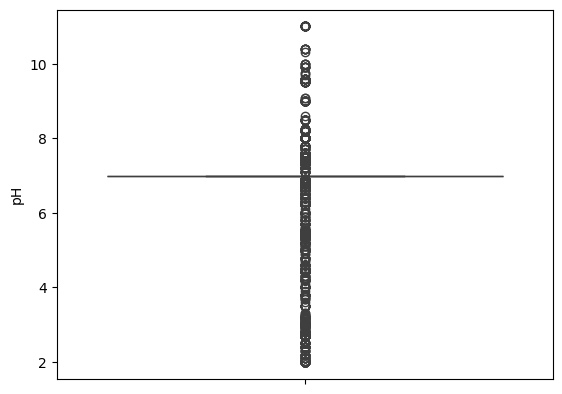

In [173]:
sns.boxplot(train_df['pH'])

<Axes: ylabel='tm'>

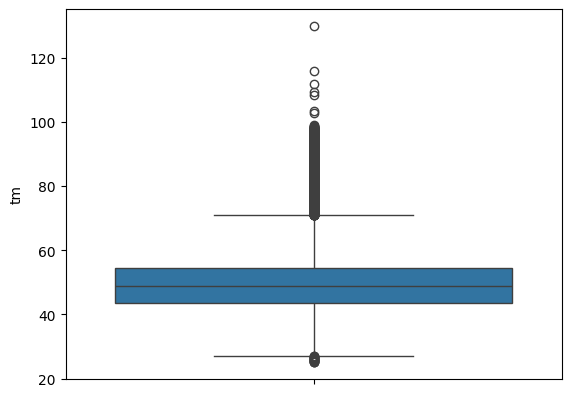

In [174]:
sns.boxplot(train_df['tm'])

In [175]:
from scipy import stats

def remove_outliers_zscore(column):
    z_scores = stats.zscore(column)
    outlier_indices = abs(z_scores) > 3
    return column

In [176]:
# Apply the function to all numeric columns in the DataFrame
train_df['tm'] = remove_outliers_zscore(train_df['tm'])
train_df['pH'] = remove_outliers_zscore(train_df['pH'])
#check after outlier detection and removal some times while dropping or replacing nan values may be created.
#change to iqr code and check urself
train_df.isna().sum()

seq_id              0
protein_sequence    0
pH                  0
tm                  0
dtype: int64

In [177]:
train_df['pH'] = pd.to_numeric(train_df.pH, errors='coerce')

<Axes: ylabel='pH'>

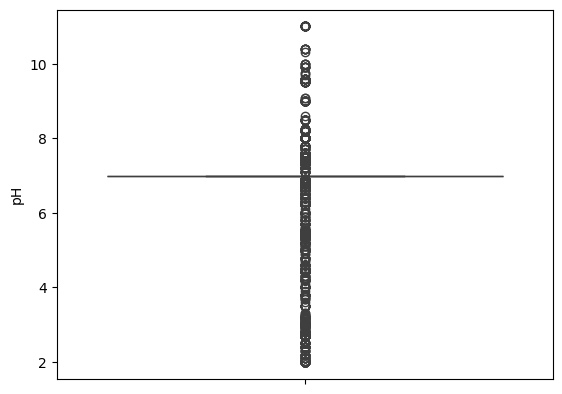

In [178]:
sns.boxplot(train_df['pH'])

<Axes: ylabel='tm'>

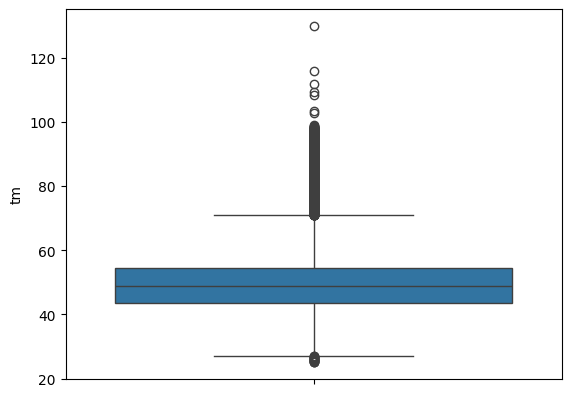

In [179]:
sns.boxplot(train_df['tm'])

In [180]:
px.histogram(train_df, x='tm', title="tm Distribution", template='plotly_dark',width=800,height=400)

In [181]:
px.histogram(train_df, x='pH', title='pH Count', template='plotly_dark')

In [182]:
train_df['protein_sequence'][0]

'AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVGMIKDAGDDPDVTHGAEIQAFVRFASEDRLEGGEGVGVVTKPGLGVPVGEPAINPVPRRMIWEAVREVTERPLAVTIAIPGGEELAKKTLNPRLGILGGLSVLGTTGVVKPYSTSAFRMSVVQAVGVARANGLLEIAATTGGKSERFAQRLLPHLPEMAFIEMGDFVGDVLRAARKVGVEVVRVVGMIGKISKMADGKTMTHAAGGEVNLSLLLSLLKEAGASPKALKEAEGAATARRFLEIALEEGLELFFVNLVRLAQEKLQAYIGERPFVSVALTDFDEGRCLAAWPDREVYR'

In [183]:
train_df.duplicated(subset=['protein_sequence','pH']).sum()

797

In [184]:
train_df.drop_duplicates(subset=['protein_sequence','pH'],inplace=True)

In [185]:
train_df.shape

(28159, 4)

In [186]:
train_df.head(3)

,seq_id,protein_sequence,pH,tm
0,0.0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,1.0,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,2.0,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5


In [187]:
amino_count = train_df['protein_sequence'].str.split('').explode('protein_sequence').value_counts().drop('')
amino_count

protein_sequence
L    1224219
A     983454
E     933435
S     931509
G     858785
V     836106
K     798432
D     715568
R     691717
I     688749
T     680948
P     649569
Q     563053
N     542565
F     484240
Y     377603
M     300588
H     294693
C     188573
W     142570
Name: count, dtype: int64

In [188]:
fig = px.bar(amino_count, x=amino_count.index, y=amino_count, color=amino_count.index)
fig.update_layout(
    title='Amino Acid Count',
    height=600,
    template='ggplot2'
)
fig.show()

**Feature Engineering**

In [189]:
train_df["protein_length"] = train_df["protein_sequence"].apply(lambda x: len(x))

In [190]:
train_df.head(3)

,seq_id,protein_sequence,pH,tm,protein_length
0,0.0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,341
1,1.0,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,286
2,2.0,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,497


In [191]:
def return_amino_acid_df(df):
  # Feature Engineering on Train Data
  amino_acids=['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
  for amino_acid in amino_acids:
    df[amino_acid]=df['protein_sequence'].str.count(amino_acid,re.I)/df['protein_length']
    #df[amino_acid]=df['protein_sequence'].str.count(amino_acid,re.I)
  return df

In [192]:
train_df = return_amino_acid_df(train_df)

In [193]:
train_df.head()

,seq_id,protein_sequence,pH,tm,protein_length,A,C,D,E,F,...,M,N,P,Q,R,S,T,V,W,Y
0,0.0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,341,0.131965,0.002933,0.038123,0.087977,0.038123,...,0.023460,0.014663,0.052786,0.017595,0.073314,0.032258,0.041056,0.108504,0.011730,0.008798
1,1.0,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,286,0.097902,0.000000,0.034965,0.181818,0.020979,...,0.006993,0.020979,0.027972,0.076923,0.104895,0.048951,0.041958,0.045455,0.010490,0.010490
2,2.0,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,497,0.100604,0.018109,0.054326,0.064386,0.042254,...,0.012072,0.030181,0.040241,0.050302,0.062374,0.066398,0.060362,0.060362,0.006036,0.032193
3,3.0,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,265,0.075472,0.018868,0.071698,0.109434,0.045283,...,0.007547,0.033962,0.060377,0.033962,0.037736,0.060377,0.071698,0.052830,0.011321,0.015094
4,4.0,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,1451,0.059269,0.009649,0.053756,0.053756,0.022054,...,0.021365,0.044797,0.088215,0.037216,0.043418,0.101999,0.082702,0.085458,0.011027,0.032391


In [194]:
# PhysioChemical Properties of Amino acids

#Aromaticity
def calculate_aromaticity(row):
  sequence = str(row[1])
  X = ProteinAnalysis(sequence)
  return "%0.2f" % X.aromaticity()

#Molecular Weight
def calculate_molecular_weight(row):
  sequence = str(row[1])
  X = ProteinAnalysis(sequence)
  return "%0.2f" % X.molecular_weight()

#Instability Index
def calculate_instability_index(row):
  sequence = str(row[1])
  X = ProteinAnalysis(sequence)
  return "%0.2f" % X.instability_index()

#Hydrophobicity
def calculate_hydrophobicity(row):
  sequence = str(row[1])
  X = ProteinAnalysis(sequence)
  return "%0.2f" % X.gravy(scale='KyteDoolitle')

#Isoelectric Point
def calculate_isoelectric_point(row):
  sequence = str(row[1])
  X = ProteinAnalysis(sequence)
  return "%0.2f" % X.isoelectric_point()

#Charge
def calculate_charge(row):
  sequence = str(row[1])
  X = ProteinAnalysis(sequence)
  return "%0.2f" % X.charge_at_pH(row[2])

In [195]:
train_df['Aromaticity'] = train_df.apply(calculate_aromaticity, axis=1)
train_df['Molecular Weight'] = train_df.apply(calculate_molecular_weight, axis=1)
train_df['Instability Index'] = train_df.apply(calculate_instability_index, axis=1)
train_df['Hydrophobicity'] = train_df.apply(calculate_hydrophobicity, axis=1)
train_df['Isoelectric Point'] = train_df.apply(calculate_isoelectric_point, axis=1)
train_df['Charge'] = train_df.apply(calculate_charge, axis=1)

In [196]:
train_df.head()

,seq_id,protein_sequence,pH,tm,protein_length,A,C,D,E,F,...,T,V,W,Y,Aromaticity,Molecular Weight,Instability Index,Hydrophobicity,Isoelectric Point,Charge
0,0.0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,341,0.131965,0.002933,0.038123,0.087977,0.038123,...,0.041056,0.108504,0.011730,0.008798,0.06,36320.72,28.39,0.15,6.11,-1.87
1,1.0,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,286,0.097902,0.000000,0.034965,0.181818,0.020979,...,0.041958,0.045455,0.010490,0.010490,0.04,32837.99,65.11,-1.09,5.14,-12.72
2,2.0,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,497,0.100604,0.018109,0.054326,0.064386,0.042254,...,0.060362,0.060362,0.006036,0.032193,0.08,53428.80,35.09,-0.71,9.03,11.73
3,3.0,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,265,0.075472,0.018868,0.071698,0.109434,0.045283,...,0.071698,0.052830,0.011321,0.015094,0.07,29475.60,50.50,-0.51,4.68,-20.56
4,4.0,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,1451,0.059269,0.009649,0.053756,0.053756,0.022054,...,0.082702,0.085458,0.011027,0.032391,0.07,158761.98,45.67,-0.40,5.92,-21.66


In [197]:
train_df.drop(columns=["protein_sequence", "seq_id"], inplace=True)

In [198]:
train_df.reset_index(drop=True, inplace=True)

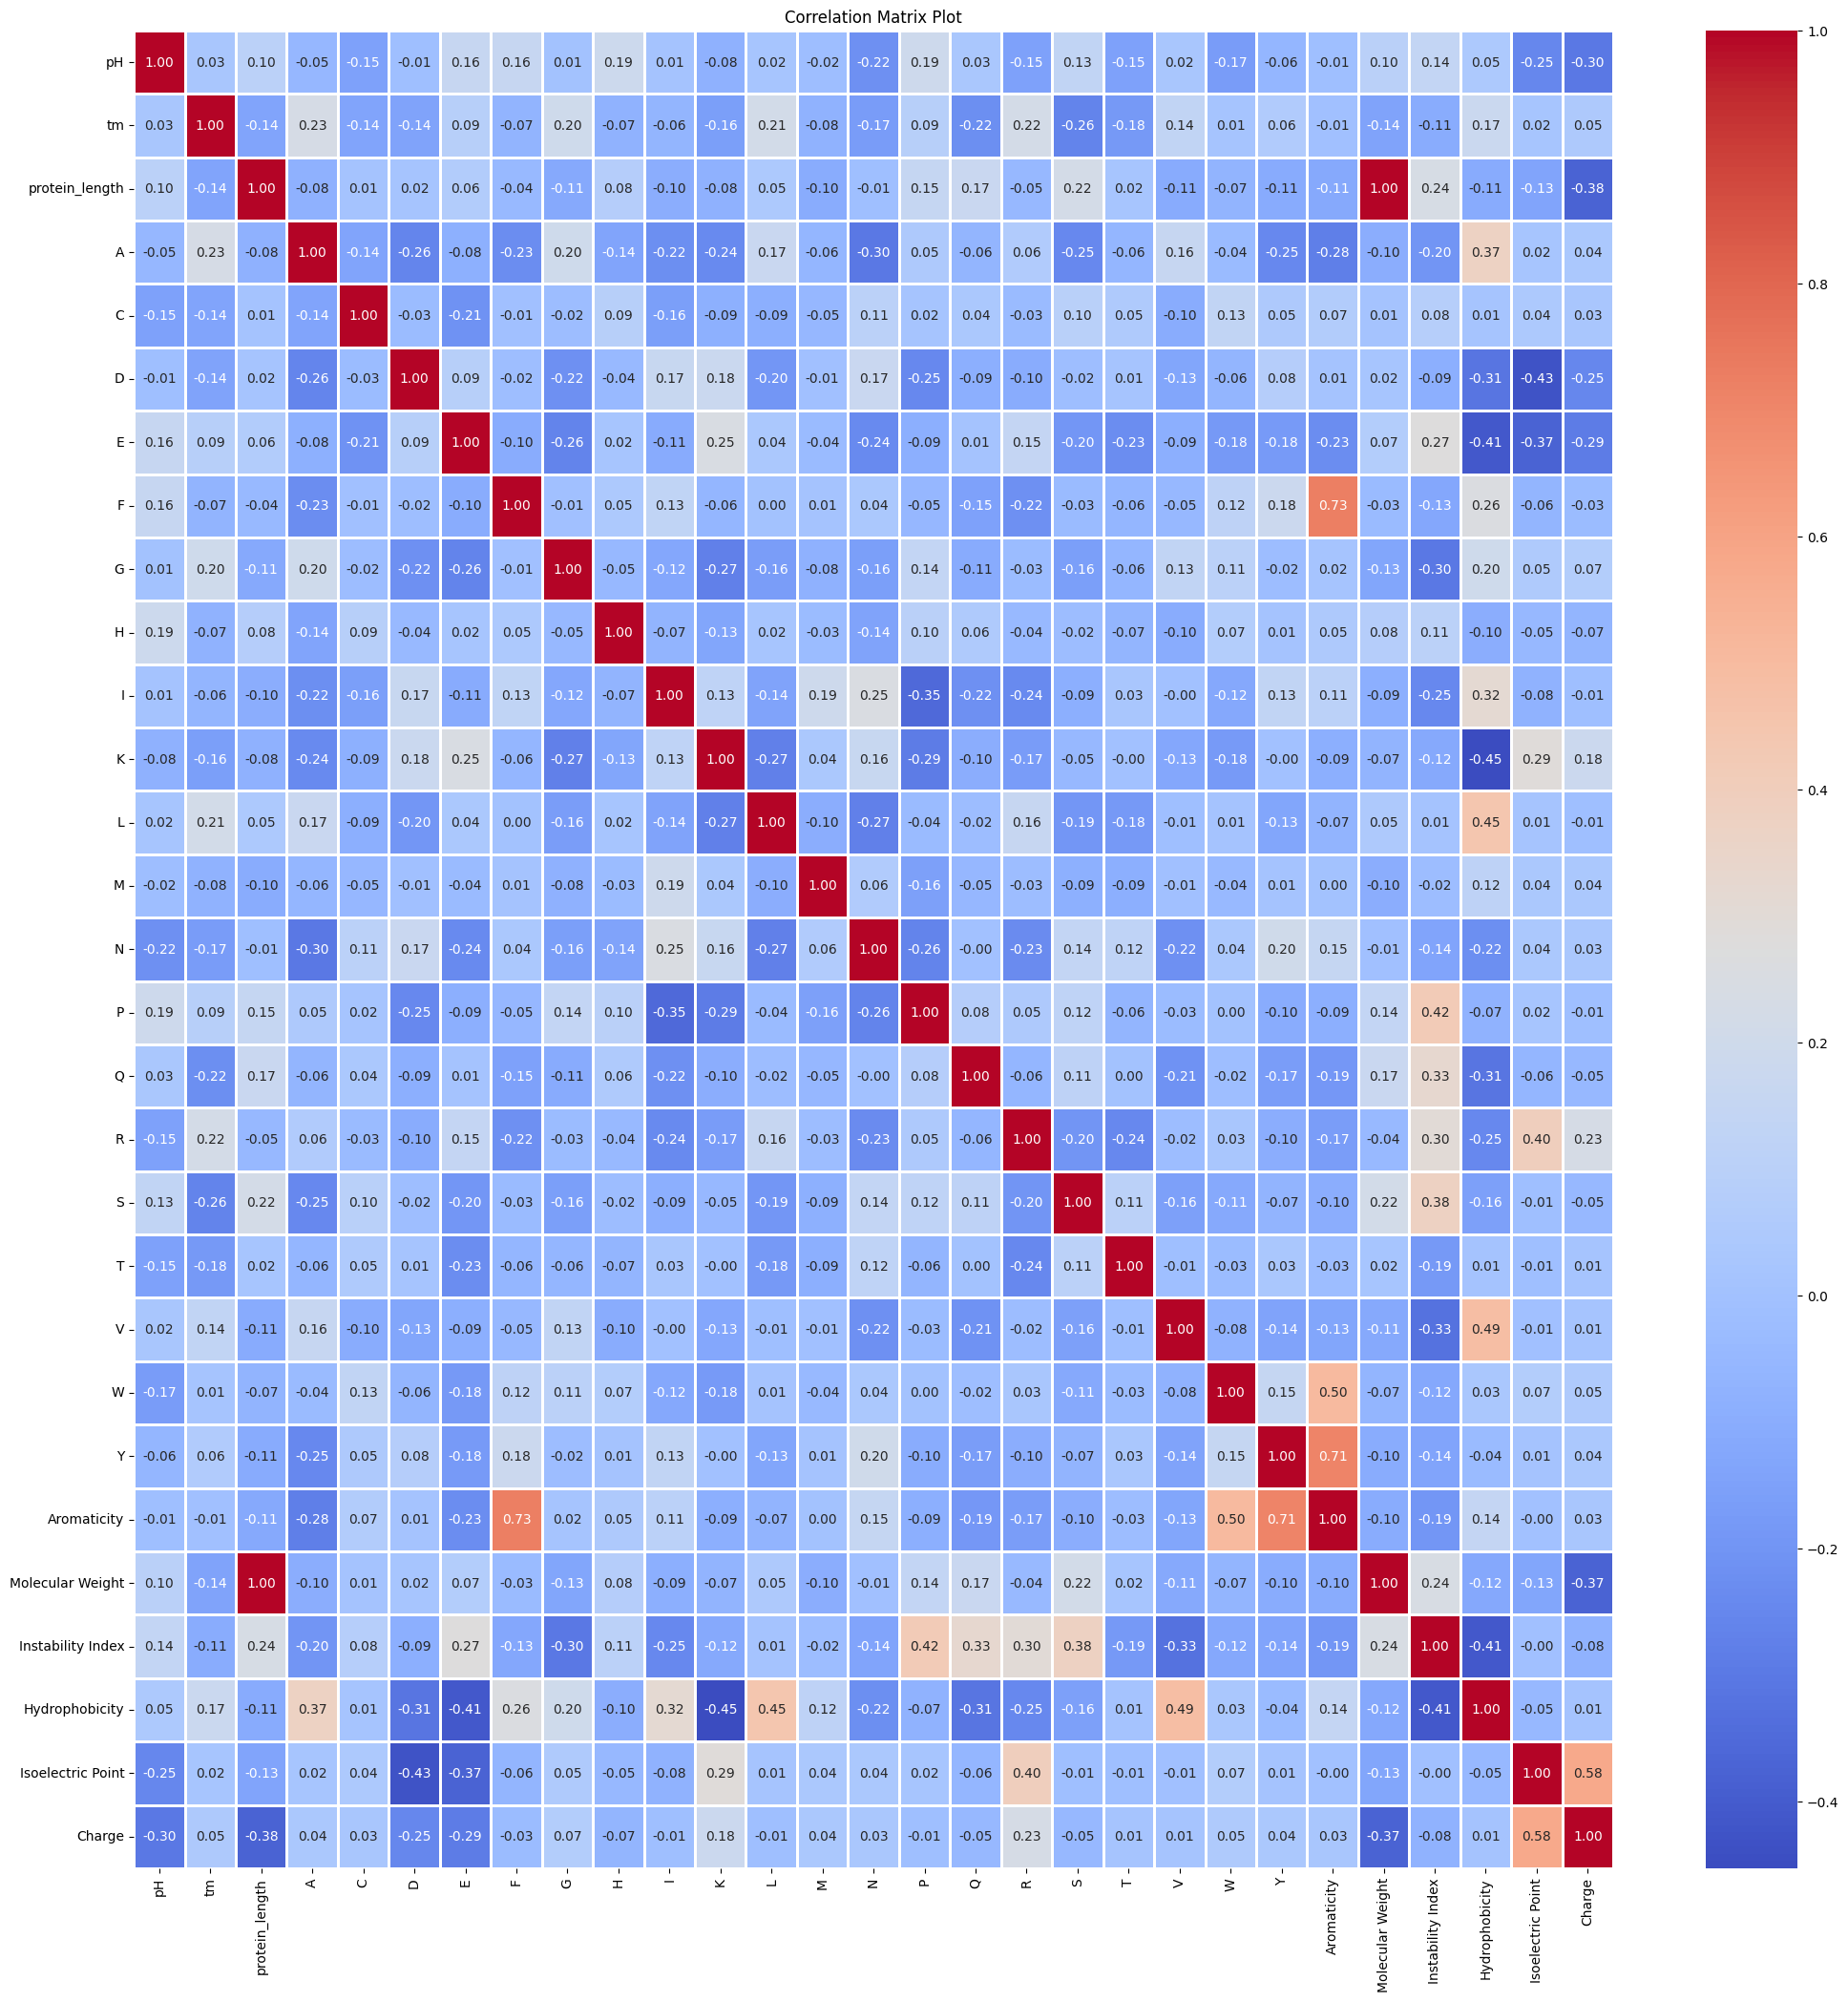

In [199]:
correlation_matrix = train_df.corr()
# Creating a heatmap using seaborn
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix Plot')
plt.show()

In [200]:
train_df['Aromaticity'] = pd.to_numeric(train_df['Aromaticity'])
train_df['Molecular Weight'] = pd.to_numeric(train_df['Molecular Weight'])
train_df['Instability Index'] = pd.to_numeric(train_df['Instability Index'])
train_df['Hydrophobicity'] = pd.to_numeric(train_df['Hydrophobicity'])
train_df['Isoelectric Point'] = pd.to_numeric(train_df['Isoelectric Point'])
train_df['Charge'] = pd.to_numeric(train_df['Charge'])

In [201]:
from sklearn.model_selection import train_test_split
X = train_df.drop(['tm'],axis=1)
y = train_df['tm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [206]:
from scipy.stats import spearmanr
pred = model.predict(X_test)
spearmanr(y_test,pred)

SignificanceResult(statistic=0.5634059973329744, pvalue=0.0)

In [207]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train, y_train)

RandomForestRegressor()

In [208]:
pred = model1.predict(X_test)
spearmanr(y_test,pred)

SignificanceResult(statistic=0.5898902569556117, pvalue=0.0)

In [211]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [212]:
pred = model2.predict(X_test)
spearmanr(y_test,pred)

SignificanceResult(statistic=0.32749669865961006, pvalue=6.453201224937567e-141)

In [214]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.9 MB/s eta 0:00:00


In [215]:
from catboost import CatBoostRegressor
model3 = CatBoostRegressor()
model3.fit(X_train, y_train)

Learning rate set to 0.066974
0:	learn: 11.7473504	total: 78.3ms	remaining: 1m 18s
1:	learn: 11.4781784	total: 107ms	remaining: 53.4s
2:	learn: 11.2393493	total: 130ms	remaining: 43.2s
3:	learn: 11.0218340	total: 153ms	remaining: 38s
4:	learn: 10.8194824	total: 175ms	remaining: 34.8s
5:	learn: 10.6304126	total: 191ms	remaining: 31.6s
6:	learn: 10.4530934	total: 217ms	remaining: 30.7s
7:	learn: 10.2985154	total: 239ms	remaining: 29.7s
8:	learn: 10.1688895	total: 268ms	remaining: 29.5s
9:	learn: 10.0366816	total: 294ms	remaining: 29.1s
10:	learn: 9.9229227	total: 306ms	remaining: 27.5s
11:	learn: 9.8186397	total: 334ms	remaining: 27.5s
12:	learn: 9.7211290	total: 356ms	remaining: 27s
13:	learn: 9.6314680	total: 378ms	remaining: 26.6s
14:	learn: 9.5383735	total: 401ms	remaining: 26.3s
15:	learn: 9.4541208	total: 423ms	remaining: 26s
16:	learn: 9.3858869	total: 447ms	remaining: 25.8s
17:	learn: 9.3191047	total: 471ms	remaining: 25.7s
18:	learn: 9.2485743	total: 496ms	remaining: 25.6s
19:	l

In [216]:
pred = model3.predict(X_test)
spearmanr(y_test,pred)

SignificanceResult(statistic=0.5892748433423844, pvalue=0.0)

In [217]:
from sklearn.svm import SVR
model4 = SVR()
model4.fit(X_train, y_train)

SVR()

In [218]:
pred = model4.predict(X_test)
spearmanr(y_test,pred)

SignificanceResult(statistic=0.1795874807921446, pvalue=4.9131183744296704e-42)

**Regressive Feature Selection** (to impove the training furthermore)

In [219]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator= model, step = 5, cv = 5, scoring='neg_mean_squared_error')
rfecv = rfecv.fit(X_train, y_train)

print("The optimal number of features:", rfecv.n_features_)
print('Selected features: %s' % list(X_train.columns[rfecv.support_]))

best_features = list(X_train.columns[rfecv.support_])

The optimal number of features: 28
Selected features: ['pH', 'protein_length', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'Aromaticity', 'Molecular Weight', 'Instability Index', 'Hydrophobicity', 'Isoelectric Point', 'Charge']


In [220]:
X_train_new = X_train[best_features]
X_test_new = X_test[best_features]

In [222]:
model5 = CatBoostRegressor()
model5.fit(X_train_new, y_train)

Learning rate set to 0.066974
0:	learn: 11.7473504	total: 12ms	remaining: 12s
1:	learn: 11.4781784	total: 22ms	remaining: 11s
2:	learn: 11.2393493	total: 31.5ms	remaining: 10.5s
3:	learn: 11.0218340	total: 41ms	remaining: 10.2s
4:	learn: 10.8194824	total: 50.9ms	remaining: 10.1s
5:	learn: 10.6304126	total: 60.2ms	remaining: 9.97s
6:	learn: 10.4530934	total: 69.1ms	remaining: 9.8s
7:	learn: 10.2985154	total: 78.6ms	remaining: 9.74s
8:	learn: 10.1688895	total: 87.7ms	remaining: 9.66s
9:	learn: 10.0366816	total: 96.8ms	remaining: 9.59s
10:	learn: 9.9229227	total: 106ms	remaining: 9.52s
11:	learn: 9.8186397	total: 115ms	remaining: 9.47s
12:	learn: 9.7211290	total: 125ms	remaining: 9.47s
13:	learn: 9.6314680	total: 134ms	remaining: 9.43s
14:	learn: 9.5383735	total: 147ms	remaining: 9.68s
15:	learn: 9.4541208	total: 156ms	remaining: 9.61s
16:	learn: 9.3858869	total: 166ms	remaining: 9.58s
17:	learn: 9.3191047	total: 175ms	remaining: 9.56s
18:	learn: 9.2485743	total: 187ms	remaining: 9.63s
19

In [225]:
y_pred_train = model5.predict(X_train_new)
y_pred_test = model5.predict(X_test_new)

Signifies that it does not overfit the train data.

In [226]:
spearmanr(y_pred_train,y_train)

SignificanceResult(statistic=0.7344781252906307, pvalue=0.0)

In [227]:
spearmanr(y_pred_test,y_test)

SignificanceResult(statistic=0.5892748433423844, pvalue=0.0)

In [229]:
eval_df = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred_test})
spearmanr_val = spearmanr(eval_df["Actual"], eval_df["Predicted"])

In [230]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(
    go.Scattergl(
        x=eval_df["Actual"],
        y=eval_df["Predicted"],
        name='Actual vs. Predicted',
        mode='markers'
    )
)

fig.add_annotation(
    x=0.95,
    y=0.10,
    xref='paper',
    yref='paper',
    text='Spearman Rank Correlation = {:.3f}'.format(spearmanr_val.correlation),
    showarrow=False
)

fig.update_layout(
    title='Actual vs. Predicted',
    height=700
)

fig.show()

In [231]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_test, y_pred_test)
print('r2 score for train is', r2_train)
print('r2 score for test is', r2_val)

r2 score for train is 0.7666505036432307
r2 score for test is 0.6360313176445178


In [232]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error Train:', mean_absolute_error(y_train, y_pred_train))
print('Mean Absolute Error test:', mean_absolute_error(y_test, y_pred_test))

Mean Absolute Error Train: 4.389196178685396
Mean Absolute Error test: 5.463756895663916


In [234]:
from sklearn.model_selection import GridSearchCV
catboost_model = CatBoostRegressor()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, verbose=0)
grid_search.fit(X_train_new, y_train)

# Print the best parameters and RMSE score
print("Best parameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
spearmanr(y_pred,y_test)

Streaming output truncated to the last 5000 lines.
1:	learn: 11.6695794	total: 52.7ms	remaining: 26.3s
2:	learn: 11.5419960	total: 74.1ms	remaining: 24.6s
3:	learn: 11.4092362	total: 95.5ms	remaining: 23.8s
4:	learn: 11.2978827	total: 116ms	remaining: 23s
5:	learn: 11.1843485	total: 135ms	remaining: 22.4s
6:	learn: 11.0691206	total: 155ms	remaining: 22s
7:	learn: 10.9578704	total: 175ms	remaining: 21.8s
8:	learn: 10.8541823	total: 196ms	remaining: 21.6s
9:	learn: 10.7539783	total: 216ms	remaining: 21.4s
10:	learn: 10.6567027	total: 243ms	remaining: 21.9s
11:	learn: 10.5634040	total: 265ms	remaining: 21.8s
12:	learn: 10.4710679	total: 285ms	remaining: 21.6s
13:	learn: 10.3878496	total: 306ms	remaining: 21.5s
14:	learn: 10.3087415	total: 330ms	remaining: 21.7s
15:	learn: 10.2357200	total: 362ms	remaining: 22.3s
16:	learn: 10.1578321	total: 384ms	remaining: 22.2s
17:	learn: 10.0814660	total: 407ms	remaining: 22.2s
18:	learn: 10.0065989	total: 426ms	remaining: 22s
19:	learn: 9.9401839	tota

SignificanceResult(statistic=0.5936646072111422, pvalue=0.0)

In [235]:
eval_df = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
spearmanr_val = spearmanr(eval_df["Actual"], eval_df["Predicted"])

In [236]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(
    go.Scattergl(
        x=eval_df["Actual"],
        y=eval_df["Predicted"],
        name='Actual vs. Predicted',
        mode='markers'
    )
)

fig.add_annotation(
    x=0.95,
    y=0.10,
    xref='paper',
    yref='paper',
    text='Spearman Rank Correlation = {:.3f}'.format(spearmanr_val.correlation),
    showarrow=False
)

fig.update_layout(
    title='Actual vs. Predicted',
    height=700
)

fig.show()

In [237]:
from sklearn.metrics import r2_score
r2_val = r2_score(y_test, y_pred)
print('r2 score for train is', r2_train)

r2 score for train is 0.7666505036432307
